<a href="https://colab.research.google.com/github/colin-kong/HR_Prediction/blob/main/HR_prediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For ignoring future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline
sns.set()

Importing data into pandas dataframe from csv file

In [2]:
df = pd.read_csv("HR_dataset.csv")

Doing data exploration

In [3]:
df.sample(10)

names  satisfaction_level  ...        role  salary
1339        Michael Quan                0.89  ...   technical     low
10738     Anna Farruggio                0.68  ...     support    high
4838      Joseph Eastman                0.46  ...  accounting     low
4107          James Mast                0.55  ...          IT  medium
4540   Michael Stevenson                0.54  ...   technical  medium
8649    Elizabeth Walker                0.58  ...       sales  medium
14276    Donnell Maybury                0.81  ...          IT  medium
4652       Manuel Warner                0.45  ...       RandD  medium
13029        Greg Palmer                0.63  ...   technical  medium
529       Wilson Linkous                0.39  ...  accounting  medium

[10 rows x 11 columns]

In [4]:
df.describe()

satisfaction_level  last_evaluation  ...  left_company  promotion_last_5years
count        15000.000000     15000.000000  ...  15000.000000           15000.000000
mean             0.612847         0.716115  ...      0.238133               0.021267
std              0.248628         0.171171  ...      0.425955               0.144277
min              0.090000         0.360000  ...      0.000000               0.000000
25%              0.440000         0.560000  ...      0.000000               0.000000
50%              0.640000         0.720000  ...      0.000000               0.000000
75%              0.820000         0.870000  ...      0.000000               0.000000
max              1.000000         1.000000  ...      1.000000               1.000000

[8 rows x 8 columns]

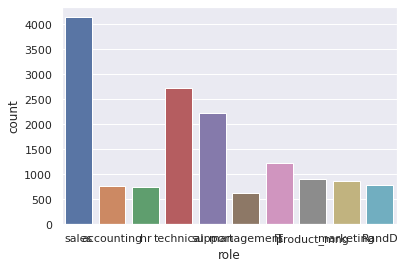

In [5]:
ax = sns.countplot(df['role'])

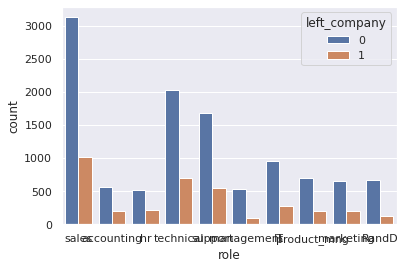

In [6]:
ax = sns.countplot(x="role", hue= "left_company", data=df)

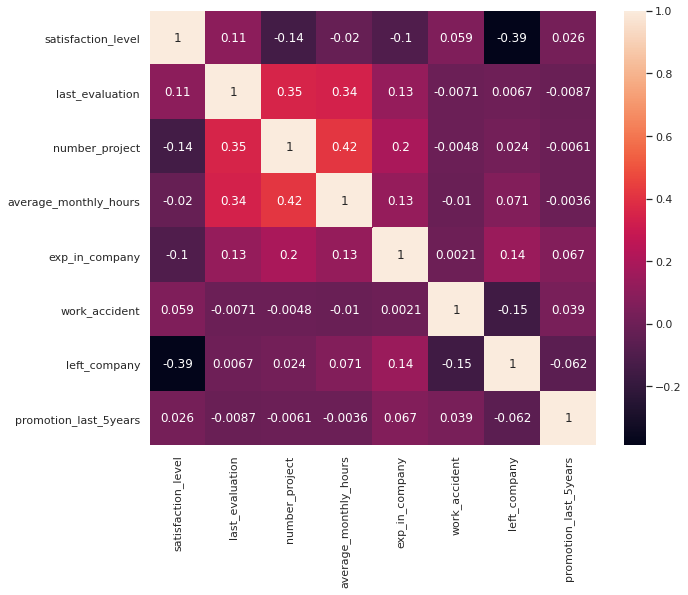

In [7]:
corr = df.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot=True)

**Observation**


1.  Maximum number of years in the company is 10 years and 75% of the employees are working 4 years or below in this company.
2.   Sales department has highest number of employees and highest turn over
3.   Attrition  rate of this company is 23%

* the dataset does not require data cleaning


For this prediction I am going to use KNN model.

In [10]:
inputs = ['satisfaction_level','number_project', 'average_monthly_hours']
X = df[inputs]
y = df['left_company']

Splitting data for training(70%) and testing(30%)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Train KNeighborsRegressor and show prediction accuracy

In [13]:
from sklearn.neighbors import KNeighborsRegressor


knn_regressor1 = KNeighborsRegressor(n_neighbors=3)
knn_regressor1.fit(X_train, y_train)

knn_regressor2 = KNeighborsRegressor(n_neighbors=2)
knn_regressor2.fit(X_train, y_train)

knn_regressor3 = KNeighborsRegressor(n_neighbors=4)
knn_regressor3.fit(X_train, y_train)

print('KNeighborsRegressor1 :', knn_regressor1.score(X_test, y_test))
print('KNeighborsRegressor2 :', knn_regressor2.score(X_test, y_test))
print('KNeighborsRegressor3 :', knn_regressor3.score(X_test, y_test))

KNeighborsRegressor1 : 0.6386993718865064
KNeighborsRegressor2 : 0.6597831384015594
KNeighborsRegressor3 : 0.6272691276803118


Train KNeighborsClassifier and show prediction accuracy

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_classifier1 = KNeighborsClassifier(n_neighbors=3)
knn_classifier1.fit(X_train, y_train)
y_pred_class1 = knn_classifier1.predict(X_test)

knn_classifier2 = KNeighborsClassifier(n_neighbors=3)
knn_classifier2.fit(X_train, y_train)
y_pred_class2 = knn_classifier2.predict(X_test)

knn_classifier3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier3.fit(X_train, y_train)
y_pred_class3 = knn_classifier3.predict(X_test)

print('KNeighborsClassifier1 : ',metrics.accuracy_score(y_test, y_pred_class1))
print('KNeighborsClassifier2 : ',metrics.accuracy_score(y_test, y_pred_class2))
print('KNeighborsClassifier3 : ',metrics.accuracy_score(y_test, y_pred_class3))

KNeighborsClassifier1 :  0.9084444444444445
KNeighborsClassifier2 :  0.9084444444444445
KNeighborsClassifier3 :  0.9084444444444445


It shows that classification model has higher accuracy compare to regression model in this prediction.
I am going to use 2 for n_neighbors.
hr_predict.csv is record of current employee in the company. using trained model to predict if the employee will stay or leave.

In [15]:
predict = pd.read_csv("hr_predict.csv")
X_predict = predict[inputs]
predictions1 = knn_regressor2.predict(X_predict)
predictions2 = knn_classifier2.predict(X_predict)

In [16]:
# Storing prediction result to dataframe

percent_left= (predictions1 * 100)
predict['left_predict_percent'] = percent_left.round(2)
predict['left_predict2'] = predictions2
predict

id           names  ...  left_predict_percent  left_predict2
0    2237     Paul Mathey  ...                   0.0              0
1    8127    Shawn Torres  ...                   0.0              0
2    8146   Emily Staples  ...                   0.0              0
3   14441    Jean Salazar  ...                 100.0              1
4   11909    Javier Folse  ...                   0.0              0
..    ...             ...  ...                   ...            ...
95  12162    Robert Davis  ...                 100.0              1
96  14646      Kevin Reid  ...                 100.0              1
97  10385     Mary Valdez  ...                   0.0              0
98   9524  William Jaeger  ...                   0.0              0
99  13936     John Booker  ...                   0.0              0

[100 rows x 15 columns]

Two columns were added left_predict_percent is percentage if employee will leave company using regression model and left_predict2 is prediction if employee is going to leave using clasification model (1 = will leave, 0=will stay).

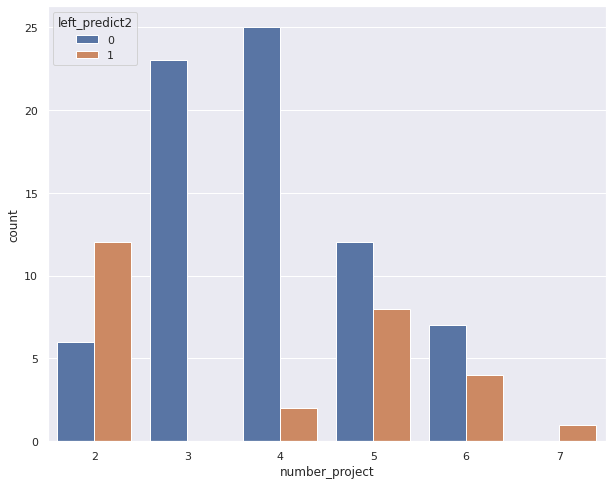

In [17]:
sns.countplot(x="number_project", hue="left_predict2", data=predict );

**Final Observation and Suggestion**

The reason that I include regression model result is to show percentage that an employee is going to leave where classification model is just showing leave or stay result.

1. Based on the prediction most of people with 2 projects per year are going to leave, this may show that they may wants more challenges.
2. Three or four projects per year has the less attrition rate
3. Managers with the staff left_predict_percent = 33.33% (or greater) can have 1:1 conversation with their staff to review their workload and to understand what excites them(if they want to retain their staff)







In [18]:
# Saving results to csv file
predict.to_csv("final_predictions.csv")